In [37]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('rocket')

from collections import Counter

import warnings 
warnings.filterwarnings('ignore')

### Brief preview 

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
print(f"Number of rows - {df.shape[0]} \nNumber of columns - {df.shape[1]}")

Number of rows - 48895 
Number of columns - 16


In [5]:
i = 1
for column in df.columns:
    
    print(f"{i}. {column}. Column type - {df[column].dtype}")
    i += 1;

1. id. Column type - int64
2. name. Column type - object
3. host_id. Column type - int64
4. host_name. Column type - object
5. neighbourhood_group. Column type - object
6. neighbourhood. Column type - object
7. latitude. Column type - float64
8. longitude. Column type - float64
9. room_type. Column type - object
10. price. Column type - int64
11. minimum_nights. Column type - int64
12. number_of_reviews. Column type - int64
13. last_review. Column type - object
14. reviews_per_month. Column type - float64
15. calculated_host_listings_count. Column type - int64
16. availability_365. Column type - int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### Cleaning and Undestanding the data

Check for missing data

In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can deal with missing data in that way. NaN name and host_name will be replaced with 'Unknown'. last_review can be dropped, because if there were no reviews for the listing - date simply will not exist. 'reviews_per_month' can be handled with 0.0 values

In [9]:
## dealing with missing data

# removing 'last_review' column
df.drop('last_review', axis=1, inplace=True)

df[['name', 'host_name']][df[['name', 'host_name']].isna()] = 'Unknown'
df['reviews_per_month'][df['reviews_per_month'].isna()] = 0.0

In [10]:
df.drop(['id', 'host_name'], axis=1, inplace=True)

In [11]:
df['name'].fillna('Unknown', inplace=True)

In [12]:
df.isna().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
df

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


Categorical unique values

In [14]:
def print_unique_val(df):
    columns = [column for column in df.columns if df[column].dtype == 'object']
    for column in columns:
        if (df[column].nunique() > 12):
            print(f"{column} --- number of unique values = {df[column].nunique()}")
        else:
            print(f"{column} --- number of unique values = {df[column].nunique()}")
            print("Values ",list(df[column].unique()))

In [15]:
print_unique_val(df)

name --- number of unique values = 47906
neighbourhood_group --- number of unique values = 5
Values  ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
neighbourhood --- number of unique values = 221
room_type --- number of unique values = 3
Values  ['Private room', 'Entire home/apt', 'Shared room']


### Exploring and Visualizing Data

#### Hosts

In [16]:
## top hosts
top_hosts = df.host_id.value_counts().head(10)
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [17]:
top_host_df=pd.DataFrame(top_hosts)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

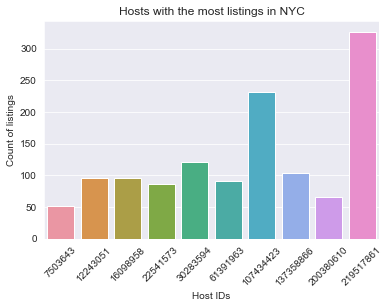

In [18]:
top_hosts_plt = sns.barplot(x="Host_ID", y='P_Count', data=top_host_df)
top_hosts_plt.set_title('Hosts with the most listings in NYC')
top_hosts_plt.set_ylabel('Count of listings')
top_hosts_plt.set_xlabel('Host IDs')
top_hosts_plt.set_xticklabels(top_hosts_plt.get_xticklabels(), rotation=45)


#### Districts

In [19]:
mean_by_neighbourhood_group = df.groupby('neighbourhood_group', as_index=False)['price'].mean()
mean_by_neighbourhood_group_df=pd.DataFrame(mean_by_neighbourhood_group)
mean_by_neighbourhood_group_df.rename(columns={'neighbourhood_group':'district', 'price':'mean_price'}, inplace=True)
mean_by_neighbourhood_group_df

,district,mean_price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


[Text(0, 0, 'Manhattan'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Staten Island'),
 Text(3, 0, 'Queens'),
 Text(4, 0, 'Bronx')]

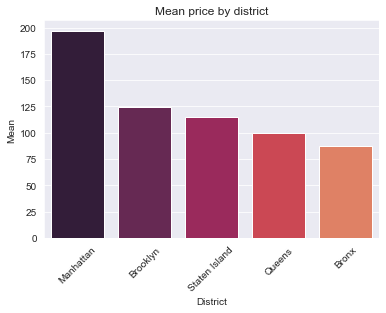

In [20]:
mean_by_neighbourhood_group_plt = sns.barplot(x="district", y='mean_price', data=mean_by_neighbourhood_group_df.sort_values(by='mean_price', ascending=False))
mean_by_neighbourhood_group_plt.set_title('Mean price by district')
mean_by_neighbourhood_group_plt.set_ylabel('Mean')
mean_by_neighbourhood_group_plt.set_xlabel('District')
mean_by_neighbourhood_group_plt.set_xticklabels(mean_by_neighbourhood_group_plt.get_xticklabels(), rotation=45)

More info about price in districs

In [21]:
#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [22]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]

In [23]:
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [24]:
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)

#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


We can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

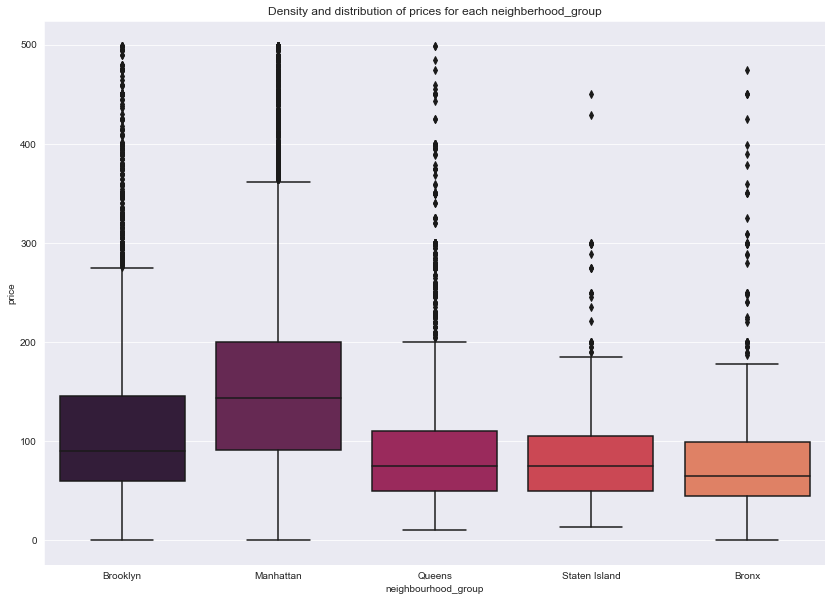

In [25]:
price_without_out = df[df.price < 500]
plt.figure(figsize=(14,10))
sns.boxplot(data=price_without_out, x='neighbourhood_group', y='price')
plt.title('Density and distribution of prices for each neighberhood_group')

First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

#### Neighbourhoods

In [26]:
top_10_neighb = df.neighbourhood.value_counts().head(10).index
top_10_neighb

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object')

In [27]:
top_neghb_df = df.loc[df['neighbourhood'].isin(top_10_neighb)]

In [28]:
top_neghb_df

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


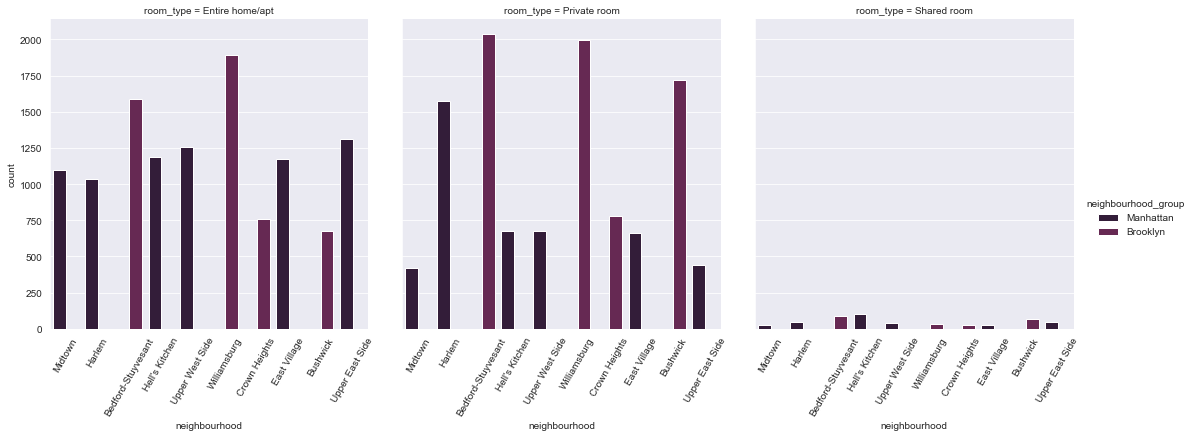

In [29]:
neighb_plt = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=top_neghb_df, kind='count')
neighb_plt.set_xticklabels(rotation=60)

#### Longtitude and latitude 

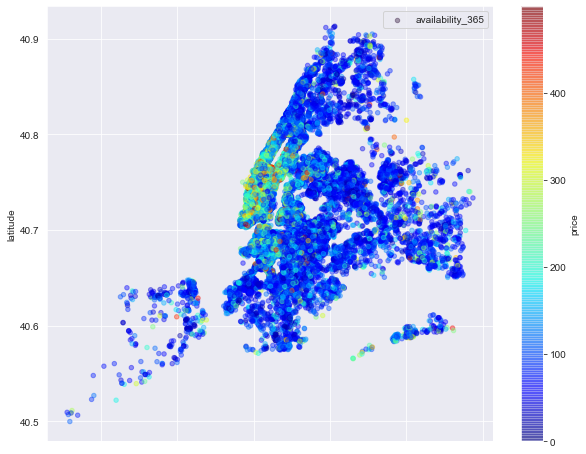

In [30]:
long_lat_plt=price_without_out.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
long_lat_plt.legend()

#### Name

In [35]:
_names_=[]

for name in df.name:
    _names_.append(name)

def split_name(name):
    return str(name).split()

_names_for_count_=[]

for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [38]:
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [40]:
_top_25_df = pd.DataFrame(_top_25_w)
_top_25_df.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

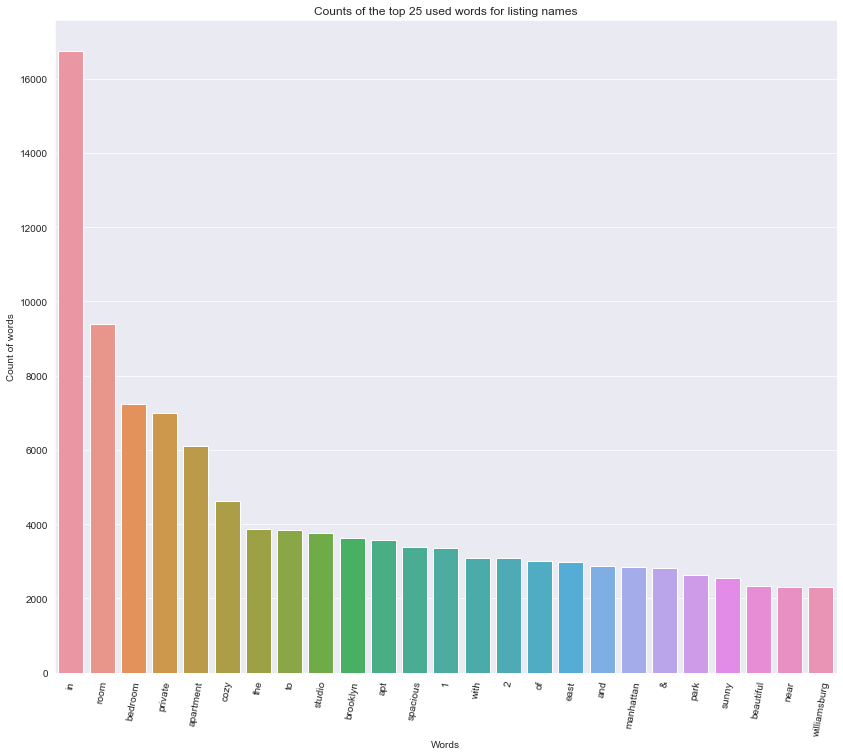

In [46]:
plt.figure(figsize=(14,12))
top_w_plt = sns.barplot(x='Words', y='Count', data=_top_25_df)
top_w_plt.set_title('Counts of the top 25 used words for listing names')
top_w_plt.set_ylabel('Count of words')
top_w_plt.set_xlabel('Words')
top_w_plt.set_xticklabels(top_w_plt.get_xticklabels(), rotation=80)

Mean price per night for 10 most relevant listings

In [49]:
top_10_rev = df.nlargest(10, 'number_of_reviews')

In [50]:
price_avrg=top_10_rev.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4
